# Guided Project #9 - Analyzing CIA Factbook Data Using SQLite and Python
By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) and [Dataquest](http://www.dataquest.io)

In this guided project, I'll work with data from the CIA World Factbook. The database is a compendium of statistics about all the countries on Earth.

My objetive is to follow the Python SQLite workflow to explore, analyze, and visualize data from this database.

The data dictionary of some of the columns is as follows:

* `name` - The name of the country.
* `area` - The total land and sea area of the country.
* `area_land` - The country's land area in square kilometers.
* `area_water` - The country's water area in square kilometers.
* `population` - The propulation as of 2015.
* `population_growth` - The annual population growth rate, as a percentage.
* `birth_rate` -  The country's birth rate, or the number of births a year per 1,000 people.
* `death_rate` -  The country's death rate, or the number of death a year per 1,000 people.

## 1.- Library and Jupyter setup.
Import `sqlite3`, `pandas` and query database to get preliminary info.

In [16]:
import sqlite3

conn = sqlite3.connect("factbook.db")
q = "SELECT * FROM sqlite_master WHERE type='table';"
conn.execute(q).fetchall() #Used shortcut to implicity create cursor object.

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [17]:
import pandas as pd
pd.read_sql_query(q, conn) #Used pandas to get dataframe instead of nested tuples.

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


## 2.- Connect to database and return first 5 rows.
Use SQL query to display `facts` database.

In [18]:
query = "SELECT * FROM facts LIMIT 5;" #Need to research if semicolon ";" mandatory after statement.
pd.read_sql_query(query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


It seems that the database is not the same as the one in the class. I'm missing two columns : `created_at` and `updated_at`. Won't be able to do datetime analysis if required.

## 3.- Calculate summary statistics.
Use SQL query to display maximuns and minimuns.

In [19]:
query = "SELECT MAX(population), MIN(population), MAX(population_growth), MIN(population_growth) FROM facts;"
pd.read_sql_query(query, conn)

,MAX(population),MIN(population),MAX(population_growth),MIN(population_growth)
0,7256490011,0,4.02,0.0


There seems to be at least 2 outliers. One country has a population of 7 billion and another of 0. Let's zoom in on these countries.

## 4.- Query outliers.
Use SQL query to display the names of those outliers.

In [20]:
query = "SELECT name FROM facts WHERE population = 0" #Possible to change to a Subquery
pd.read_sql_query(query, conn)

,name
0,Antarctica


In [21]:
query = "SELECT name FROM facts WHERE population = 7256490011" #Possible to change to a Subquery
pd.read_sql_query(query, conn)

,name
0,World


That's the reason we had these outliers. This database has rows for Earth and Antarctica which are not countries. This is probably an error, or maybe there is another reason they were included. I'll remove them from further analysis.

## 5.- Plot histograms using matplotlib.
Use SQL query to fetch columns and plot 2 by 2 grid histograms.

In [22]:
query = """
SELECT population, population_growth, birth_rate, death_rate FROM facts
WHERE population != 0 AND population != 725690011; 
"""
pd.read_sql_query(query, conn) #In code above it's possible to use a Subquery

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


Let's use subqueries to make code more readable.

In [23]:
query = """
SELECT population, population_growth, birth_rate, death_rate FROM facts
WHERE population != (SELECT MAX(population) FROM facts) 
AND population != (SELECT MIN(population) FROM facts); 
"""
pd.read_sql_query(query, conn)

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49
5,92436,1.24,15.85,5.69
6,43431886,0.93,16.64,7.33
7,3056382,0.15,13.61,9.34
8,22751014,1.07,12.15,7.14
9,8665550,0.55,9.41,9.42


Let's plot histograms for these 4 columns using `matplotlib` and `seaborn` for aesthetics.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0ca103198>,
      dtype=object)

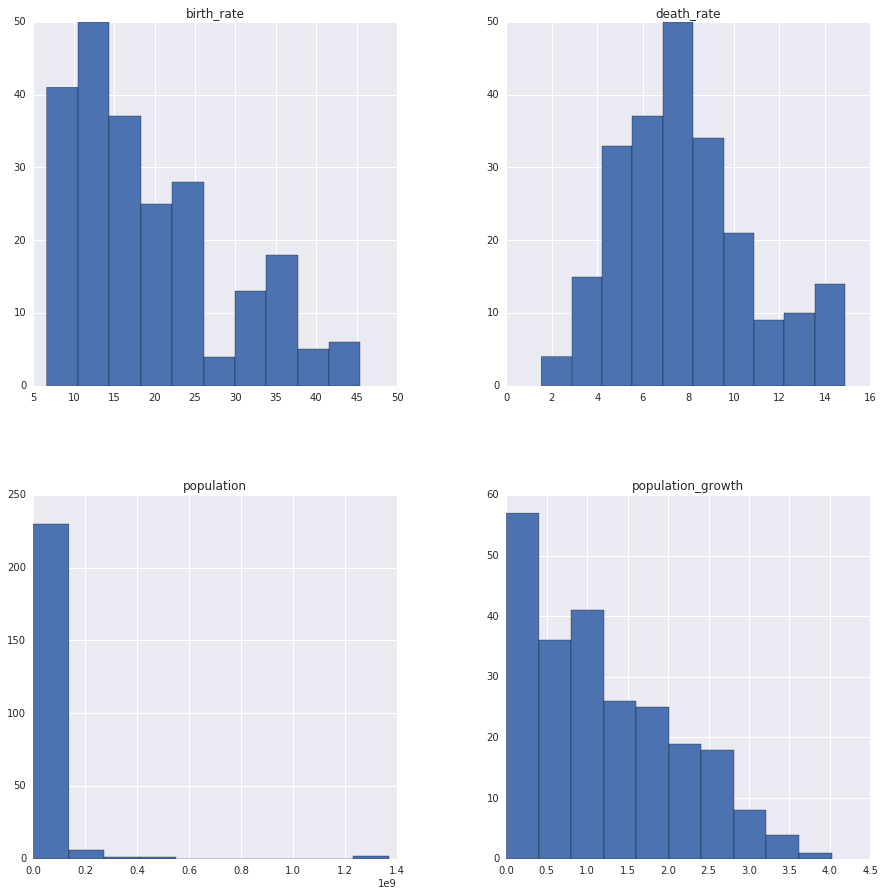

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.read_sql_query(query, conn).hist(figsize=(15,15))

Almost all countries have `population` below 0.2 x 1e9. It seems that in average `death_rate` lags behind `birth_date` by 4 points.

## 6.- Guided Project next steps.

### Which countries have the highest population density? Population density is the ratio of population to land area.

In [37]:
query = """
SELECT name, 1.0*population/area_land AS "density (people per km2)" FROM facts
WHERE population != (SELECT MAX(population) FROM facts) 
AND population != (SELECT MIN(population) FROM facts)
ORDER BY "density (people per km2)" DESC LIMIT 10;
"""
pd.read_sql_query(query, conn)

,name,density (people per km2)
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


It's interesting to note that Macau and Hong Kong are listed but remember that they're both China's Special Administrative Regions.

### Generate a histogram of population densities.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0c9e25518>]],
      dtype=object)

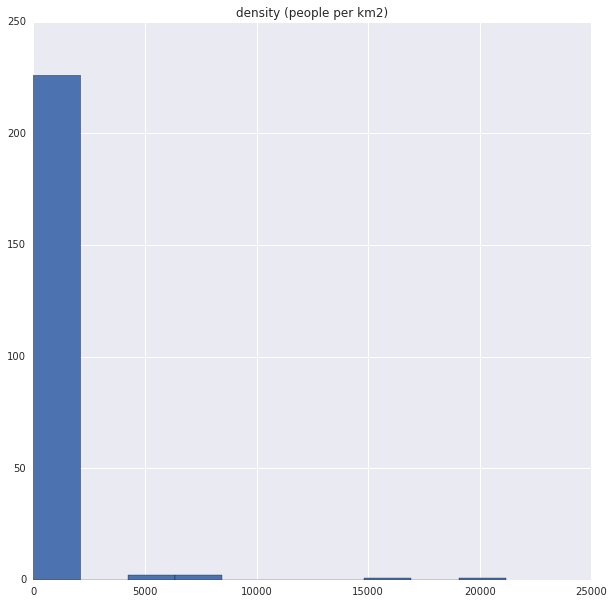

In [26]:
query = """
SELECT name, 1.0*population/area_land AS "density (people per km2)" FROM facts
WHERE population != (SELECT MAX(population) FROM facts) 
AND population != (SELECT MIN(population) FROM facts);
"""
pd.read_sql_query(query, conn).hist(figsize=(10,10))

Seems that almost all countries have a density below 5000 people per km2.

### Which countires have the highest ratios of water to land? Which countires have more water than land?

In [30]:
query = """
SELECT name, 1.0*area_water/area_land AS "water to land", area_water, area_land FROM facts
WHERE population != (SELECT MAX(population) FROM facts) 
AND population != (SELECT MIN(population) FROM facts)
ORDER BY "water to land" DESC LIMIT 10;
"""
pd.read_sql_query(query, conn)

,name,water to land,area_water,area_land
0,Virgin Islands,4.520231,1564,346
1,Puerto Rico,0.554791,4921,8870
2,"Bahamas, The",0.386613,3870,10010
3,Guinea-Bissau,0.284673,8005,28120
4,Malawi,0.259396,24404,94080
5,Netherlands,0.225710,7650,33893
6,Uganda,0.222922,43938,197100
7,Eritrea,0.164356,16600,101000
8,Liberia,0.156240,15049,96320
9,Bangladesh,0.140509,18290,130170


It seems that the only country that has more water than land is Virgin Islands.

## 10.- Closing Commentary

These are my findings after reviewing and analyzing the CIA World Factbook database:
* Antartica is considered a country.
* The majority of countries have `population` below 0.2 x 1e9.
* In average, a country's death rate lags behind its birth rate by 4 points.
* The top five countries have population density above 5000 people per square kilometre.
* Virgin Islands is only country with more water than land. 

Take aways:
* Clean database, there's some rows with errors and NaN.

Using SQLite and Python to query and analyze databases is a necessary skill to master for data science.